In the previous tutorial, we showed how to simulate a PDE with batched initial conditions. Besides the initial conditions, we can also batch other parameters of the PDE. In this example, we will show how to simulate a PDE with batched parameters.

First, let's construct a Burger's equation as before:

In [1]:
import torch
from torchfsm.mesh import MeshGrid
from torchfsm.plot import plot_traj
from torchfsm.traj_recorder import AutoRecorder
from torchfsm.field import truncated_fourier_series
device='cuda' if torch.cuda.is_available() else 'cpu'
L=1.0; N=128; 
batch_size=3

In [2]:
from torchfsm.operator import Operator, Convection, Laplacian

def Burgers(nu) -> Operator:
    return nu*Laplacian()-Convection()

Unlike the previous example, we will use a tensor for the viscosity parameter `nu` instead of a scalar. This allows us to simulate multiple scenarios with different viscosity values in a single simulation. To achieve this, we need to make sure that the batch dimension for `nu` matches the batch dimension of the initial conditions, or can be broadcast to match it.

In [3]:
nu=torch.rand([batch_size,1,1],device=device)*0.01+0.01
burgers=Burgers(nu)

In [4]:
mesh = MeshGrid([(0, L, N)], device=device)
x = mesh.bc_mesh_grid(batch_size)
u_0 = truncated_fourier_series(
    mesh=mesh, batch_size=batch_size, n_channel=1, device=device, freq_threshold=2
)
traj = burgers.integrate(
    u_0=u_0,
    mesh=mesh,
    dt=0.01,
    step=200,
    trajectory_recorder=AutoRecorder(),
)

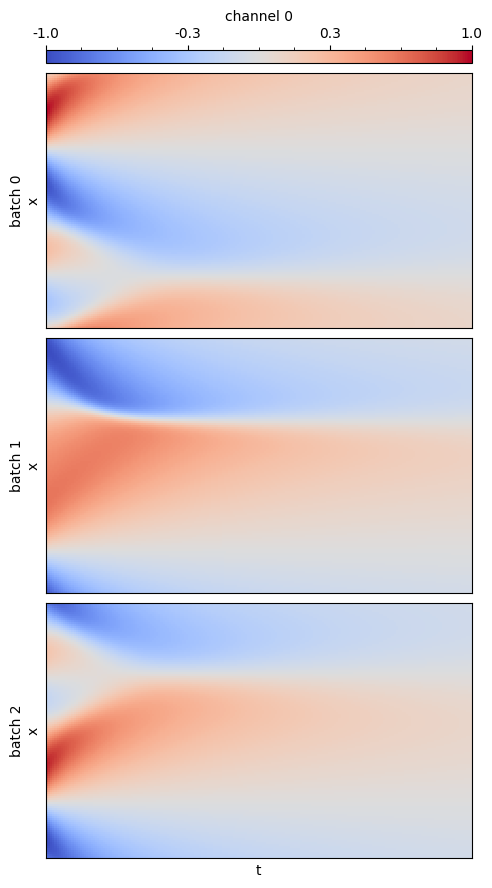

In [5]:
plot_traj(traj,animation=False)